## Example plots with the IPython notebook
So I just use the lhapdf library for loading the PDFs and plot them

## 1. Imports and defs
Here are couple of modules that I usually load. The important one if lhapdf of course. Note the path to the python lhapdf library has to be added via the sys.path.append command

In [1]:
import os
import sys
#import lhapdf
import glob
import numpy as np
from math import *
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

print(scipy.__version__)

1.15.3


Here I am loading pylab for the plotting with the `inline` mode which forces it to render the plots inside the notebook

In [2]:
%matplotlib inline

# Read Stored PDFs

In [3]:
input=(np.array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 4.85633743e-01,  4.61950240e-01,  4.36974136e-01,
          4.11285062e-01,  3.85342335e-01,  3.59527887e-01,
          3.34127343e-01,  3.09369306e-01,  2.85425172e-01,
          2.62416880e-01,  2.40432893e-01,  2.19526195e-01,
          1.99726058e-01,  1.81039891e-01,  1.63458876e-01,
          1.46960543e-01,  1.31513351e-01,  1.17079065e-01,
          1.03614568e-01,  9.10836546e-02,  7.92938010e-02,
          6.84972765e-02,  5.85189034e-02,  4.93384564e-02,
          4.09468901e-02,  3.33465916e-02,  2.65494904e-02,
          2.05728546e-02,  1.54320418e-02,  1.11325767e-02,
          7.62974039e-03,  4.93833252e-03,  2.95935159e-03,
          1.59897563e-03,  7.46328927e-04,  2.79786905e-04,
          7.25367403e-05,  9.79781289e-06,  2.66847170e-07,
          1.27774957e-13],
        [ 1.01601765e+00,  9.79639911e-01,  9.37636349e-01,
          8.91739071e-01,  8.43340712e-01,  7.93622121e-01,
          7.43485276e-01,  6.93671885e-01,  6.44757305e-01,
          5.97170138e-01,  5.51241306e-01,  5.07191748e-01,
          4.65168601e-01,  4.25249978e-01,  3.87458202e-01,
          3.51769761e-01,  3.18126182e-01,  2.86442736e-01,
          2.56614513e-01,  2.28543684e-01,  2.01855341e-01,
          1.76960968e-01,  1.53530465e-01,  1.31524417e-01,
          1.10946973e-01,  9.18508447e-02,  7.43357705e-02,
          5.85378245e-02,  4.46071593e-02,  3.26778711e-02,
          2.27608906e-02,  1.49726185e-02,  9.13821930e-03,
          5.05154038e-03,  2.43358255e-03,  9.57294376e-04,
          2.70006564e-04,  4.24400277e-05,  1.62446727e-06,
          2.43500033e-12],
        [ 1.42893788e+00,  1.37222778e+00,  1.31084919e+00,
          1.24645448e+00,  1.18036390e+00,  1.11369174e+00,
          1.04727913e+00,  9.81814399e-01,  9.17822616e-01,
          8.55690006e-01,  7.95707277e-01,  7.38061322e-01,
          6.82868336e-01,  6.30178729e-01,  5.79990628e-01,
          5.32257513e-01,  4.86899875e-01,  4.43812644e-01,
          4.02869051e-01,  3.63951268e-01,  3.26635680e-01,
          2.91355769e-01,  2.57732192e-01,  2.25699681e-01,
          1.95238765e-01,  1.66385300e-01,  1.39233910e-01,
          1.13936704e-01,  9.06928342e-02,  6.97351058e-02,
          5.12250378e-02,  3.55395989e-02,  2.27972201e-02,
          1.31090130e-02,  6.43342247e-03,  2.47914541e-03,
          6.36074173e-04,  7.64167453e-05,  1.25660970e-06,
         -3.87352984e-13],
        [ 1.68654877e+00,  1.62142984e+00,  1.55188784e+00,
          1.47956326e+00,  1.40576421e+00,  1.33159176e+00,
          1.25787579e+00,  1.18528953e+00,  1.11434415e+00,
          1.04541019e+00,  9.78762416e-01,  9.14568670e-01,
          8.52925687e-01,  7.93861383e-01,  7.37350392e-01,
          6.83318128e-01,  6.31655638e-01,  5.82224316e-01,
          5.34860284e-01,  4.89406016e-01,  4.45405294e-01,
          4.03227167e-01,  3.62455170e-01,  3.22979926e-01,
          2.84744067e-01,  2.47756978e-01,  2.12106503e-01,
          1.77968323e-01,  1.45609125e-01,  1.15388725e-01,
          8.76611269e-02,  6.30992968e-02,  4.21834325e-02,
          2.54395744e-02,  1.32181997e-02,  5.47578236e-03,
          1.55423651e-03,  2.18646398e-04,  5.18586006e-06,
         -2.53560411e-13],
        [ 1.68649000e+00,  1.62134796e+00,  1.55177558e+00,
          1.47941406e+00,  1.40556930e+00,  1.33133863e+00,
          1.25755268e+00,  1.18487887e+00,  1.11382859e+00,
          1.04476738e+00,  9.77965168e-01,  9.13586382e-01,
          8.51722345e-01,  7.92395060e-01,  7.35572836e-01,
          6.81174494e-01,  6.29083616e-01,  5.79154982e-01,
          5.31217633e-01,  4.85108770e-01,  4.40371851e-01,
          3.97369861e-01,  3.55695648e-01,  3.15254524e-01,
          2.76015369e-01,  2.38029997e-01,  2.01448472e-01,
          1.66531785e-01,  1.33655768e-01,  1.03307466e-01,
          7.59613418e-02,  5.24058482e-02,  3.31346792e-02,
          1.85564193e-02,  8.72401083e-03,  3.14541625e-03,
          7.27788104e-04,  7.39442158e-05,  8.46858755e-07,
         -3.95553138e-13],
        [ 2.78874710e+01,  2.71675713e+01,  2.62418523e+01,
          2.51636738e+01,  2.39763893e+01,  2.27173012e+01,
          2.14153956e+01,  2.00950455e+01,  1.87757931e+01,
          1.74727777e+01,  1.61984819e+01,  1.49620159e+01,
          1.37704465e+01,  1.26288328e+01,  1.15404966e+01,
          1.05074746e+01,  9.53053028e+00,  8.60950834e+00,
          7.74334575e+00,  6.93070556e+00,  6.16079922e+00,
          5.44742906e+00,  4.77954651e+00,  4.15449412e+00,
          3.57008135e+00,  3.02495866e+00,  2.51895948e+00,
          2.05331807e+00,  1.63061562e+00,  1.25440791e+00,
          9.26278729e-01,  6.52441973e-01,  4.31732999e-01,
          2.62598236e-01,  1.41548414e-01,  6.33998475e-02,
          2.06930735e-02,  3.77673242e-03,  1.63365946e-04,
          2.46339021e-10],
        [ 1.69161583e+00,  1.62734849e+00,  1.55880273e+00,
          1.48764657e+00,  1.41521709e+00,  1.34264957e+00,
          1.27081553e+00,  1.20043540e+00,  1.13207638e+00,
          1.06617117e+00,  1.00307080e+00,  9.43027114e-01,
          8.86232495e-01,  8.32826317e-01,  7.82901924e-01,
          7.36522754e-01,  6.93722436e-01,  6.54514106e-01,
          6.18889630e-01,  5.86835159e-01,  5.57940204e-01,
          5.32798643e-01,  5.10915492e-01,  4.92051974e-01,
          4.75835284e-01,  4.61694093e-01,  4.48778499e-01,
          4.35864712e-01,  4.21264920e-01,  4.02786237e-01,
          3.77921790e-01,  3.43792431e-01,  2.98323742e-01,
          2.41104673e-01,  1.74969154e-01,  1.07308393e-01,
          4.95997462e-02,  1.34342710e-02,  9.46916341e-04,
          1.50704265e-09],
        [ 1.69740938e+00,  1.63410648e+00,  1.56668244e+00,
          1.49682771e+00,  1.42590743e+00,  1.35508859e+00,
          1.28527684e+00,  1.21723460e+00,  1.15157365e+00,
          1.08877763e+00,  1.02925269e+00,  9.73312880e-01,
          9.21218328e-01,  8.73181663e-01,  8.29371424e-01,
          7.89932296e-01,  7.54976872e-01,  7.24594913e-01,
          6.98848985e-01,  6.77782073e-01,  6.60969694e-01,
          6.49115016e-01,  6.41650771e-01,  6.38280795e-01,
          6.38546334e-01,  6.41781923e-01,  6.47071581e-01,
          6.53199485e-01,  6.58587943e-01,  6.61180551e-01,
          6.58342002e-01,  6.45824973e-01,  6.17505520e-01,
          5.64251118e-01,  4.75201826e-01,  3.44945588e-01,
          1.89368781e-01,  5.87270767e-02,  4.08502947e-03,
          1.71074165e-09],
        [ 1.42928067e+00,  1.37257806e+00,  1.31120281e+00,
          1.24680858e+00,  1.18071311e+00,  1.11403097e+00,
          1.04760211e+00,  9.82113939e-01,  9.18091979e-01,
          8.55921351e-01,  7.95892912e-01,  7.38193380e-01,
          6.82939264e-01,  6.30181716e-01,  5.79919756e-01,
          5.32108380e-01,  4.86669988e-01,  4.43501514e-01,
          4.02479196e-01,  3.63487910e-01,  3.26106370e-01,
          2.90773127e-01,  2.57111093e-01,  2.25057607e-01,
          1.94595238e-01,  1.65760729e-01,  1.38648417e-01,
          1.13408330e-01,  9.02363253e-02,  6.93600654e-02,
          5.09350295e-02,  3.53313364e-02,  2.26610342e-02,
          1.30302878e-02,  6.39505140e-03,  2.46461656e-03,
          6.32461944e-04,  7.60053025e-05,  1.25029109e-06,
         -3.87400317e-13],
        [ 1.01634289e+00,  9.79972021e-01,  9.37972371e-01,
          8.92074949e-01,  8.43672189e-01,  7.93943870e-01,
          7.43791413e-01,  6.93956211e-01,  6.45012830e-01,
          5.97389578e-01,  5.51417446e-01,  5.07316999e-01,
          4.65235973e-01,  4.25252841e-01,  3.87391003e-01,
          3.51628298e-01,  3.17908093e-01,  2.86147594e-01,
          2.56244573e-01,  2.28104080e-01,  2.01353220e-01,
          1.76408171e-01,  1.52941174e-01,  1.30915279e-01,
          1.10336374e-01,  9.12582819e-02,  7.37802247e-02,
          5.80365243e-02,  4.41740102e-02,  3.23220159e-02,
          2.24857147e-02,  1.47750087e-02,  9.00900167e-03,
          4.97684346e-03,  2.39717459e-03,  9.43508654e-04,
          2.66578993e-04,  4.20496096e-05,  1.61847116e-06,
          2.43495500e-12],
        [ 4.85696894e-01,  4.62014817e-01,  4.37039430e-01,
          4.11350397e-01,  3.85406778e-01,  3.59590489e-01,
          3.34186850e-01,  3.09424714e-01,  2.85474982e-01,
          2.62459623e-01,  2.40467232e-01,  2.19550718e-01,
          1.99739208e-01,  1.81040498e-01,  1.63445873e-01,
          1.46933120e-01,  1.31470986e-01,  1.17021742e-01,
          1.03542604e-01,  9.09981174e-02,  7.91960667e-02,
          6.83896660e-02,  5.84041594e-02,  4.92198221e-02,
          4.08279800e-02,  3.32311613e-02,  2.64412739e-02,
          2.04751906e-02,  1.53476551e-02,  1.10632445e-02,
          7.57612135e-03,  4.89982706e-03,  2.93417124e-03,
          1.58441993e-03,  7.39234172e-04,  2.77100455e-04,
          7.18688377e-05,  9.72173790e-06,  2.65679003e-07,
          1.27766214e-13],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]]),
 np.array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 4.93292704e-01,  4.70934935e-01,  4.46594939e-01,
          4.21020059e-01,  3.94803739e-01,  3.68440742e-01,
          3.42302983e-01,  3.16689884e-01,  2.91828310e-01,
          2.67882638e-01,  2.44975164e-01,  2.23183456e-01,
          2.02555442e-01,  1.83112071e-01,  1.64853533e-01,
          1.47763240e-01,  1.31812994e-01,  1.16965613e-01,
          1.03177104e-01,  9.04095997e-02,  7.84573181e-02,
          6.75849009e-02,  5.76003878e-02,  4.84739602e-02,
          4.01847626e-02,  3.27212859e-02,  2.60798666e-02,
          2.02613828e-02,  1.52655392e-02,  1.10848108e-02,
          7.66740401e-03,  5.02315596e-03,  3.05801174e-03,
          1.68668047e-03,  8.09343187e-04,  3.15477197e-04,
          8.68819358e-05,  1.29873959e-05,  4.35734157e-07,
          4.92741920e-13],
        [ 1.02488831e+00,  9.94589447e-01,  9.56456617e-01,
          9.12708115e-01,  8.65128351e-01,  8.15231271e-01,
          7.64176298e-01,  7.12920214e-01,  6.62209831e-01,
          6.12607337e-01,  5.64554639e-01,  5.18355799e-01,
          4.74225062e-01,  4.32293007e-01,  3.92621416e-01,
          3.55218742e-01,  3.20049794e-01,  2.87047803e-01,
          2.56120735e-01,  2.27179705e-01,  1.99830112e-01,
          1.74525966e-01,  1.50905753e-01,  1.28913578e-01,
          1.08527570e-01,  8.97652487e-02,  7.26815589e-02,
          5.73608998e-02,  4.38991784e-02,  3.23803995e-02,
          2.27809069e-02,  1.51910797e-02,  9.44106914e-03,
          5.34581015e-03,  2.65996831e-03,  1.09449726e-03,
          3.30036710e-04,  5.76242632e-05,  2.68620451e-06,
          9.36801690e-12],
        [ 1.66417797e+00,  1.60604622e+00,  1.54140151e+00,
          1.47234864e+00,  1.40057042e+00,  1.32748269e+00,
          1.25415704e+00,  1.18146646e+00,  1.11007770e+00,
          1.04048231e+00,  9.73048199e-01,  9.08012450e-01,
          8.45522359e-01,  7.85641123e-01,  7.28364942e-01,
          6.73631799e-01,  6.21336310e-01,  5.71337573e-01,
          5.23463716e-01,  4.77546898e-01,  4.33104013e-01,
          3.90515324e-01,  3.49337373e-01,  3.09451203e-01,
          2.70797782e-01,  2.33398436e-01,  1.97374351e-01,
          1.62963121e-01,  1.30529284e-01,  1.00566268e-01,
          7.35751874e-02,  5.03794519e-02,  3.15090603e-02,
          1.73792956e-02,  8.00303020e-03,  2.80796002e-03,
          6.27852548e-04,  6.15213075e-05,  6.30832596e-07,
         -1.52940204e-12],
        [ 1.61993302e+00,  1.56311413e+00,  1.49975825e+00,
          1.43197381e+00,  1.36144787e+00,  1.28960117e+00,
          1.21751131e+00,  1.14605635e+00,  1.07591290e+00,
          1.00757789e+00,  9.41430606e-01,  8.77718192e-01,
          8.16600244e-01,  7.58153360e-01,  7.02388189e-01,
          6.49259469e-01,  5.98678617e-01,  5.50522565e-01,
          5.04637595e-01,  4.60872054e-01,  4.18749052e-01,
          3.78672419e-01,  3.40190514e-01,  3.03169808e-01,
          2.67517046e-01,  2.33191771e-01,  2.00218056e-01,
          1.68693906e-01,  1.38798026e-01,  1.10797330e-01,
          8.49648094e-02,  6.18839373e-02,  4.19936790e-02,
          2.58152852e-02,  1.37550826e-02,  5.89608260e-03,
          1.75783774e-03,  2.66862129e-04,  7.28609126e-06,
         -1.14901487e-12],
        [ 1.61922565e+00,  1.56225814e+00,  1.49872424e+00,
          1.43072644e+00,  1.35994425e+00,  1.28779151e+00,
          1.21533671e+00,  1.14344722e+00,  1.07278672e+00,
          1.00383836e+00,  9.36965265e-01,  8.72396537e-01,
          8.10271056e-01,  7.50642891e-01,  6.93499178e-01,
          6.38768475e-01,  5.86337398e-01,  5.36059268e-01,
          4.87760935e-01,  4.41279927e-01,  3.96150474e-01,
          3.52781934e-01,  3.10788841e-01,  2.70137973e-01,
          2.30894348e-01,  1.93247502e-01,  1.57531319e-01,
          1.24230090e-01,  9.39586119e-02,  6.74062713e-02,
          4.51149883e-02,  2.77410643e-02,  1.52744777e-02,
          7.30085267e-03,  2.91151142e-03,  9.16536092e-04,
          2.01871649e-04,  2.27593621e-05,  2.54063703e-07,
         -1.53070667e-12],
        [ 2.80721277e+01,  2.75434750e+01,  2.67427488e+01,
          2.57378010e+01,  2.45837213e+01,  2.33277538e+01,
          2.20066334e+01,  2.06511618e+01,  1.92860040e+01,
          1.79303014e+01,  1.65997917e+01,  1.53060053e+01,
          1.40579121e+01,  1.28620200e+01,  1.17226550e+01,
          1.06426115e+01,  9.62319113e+00,  8.66456543e+00,
          7.76590641e+00,  6.92603754e+00,  6.13362938e+00,
          5.40370770e+00,  4.72459302e+00,  4.09351199e+00,
          3.50803033e+00,  2.96636322e+00,  2.46765334e+00,
          2.01215143e+00,  1.60117127e+00,  1.23681635e+00,
          9.19339110e-01,  6.53640811e-01,  4.37992578e-01,
          2.70836450e-01,  1.49236629e-01,  6.89482248e-02,
          2.36300414e-02,  4.70670910e-03,  2.48902402e-04,
          9.40584617e-10],
        [ 1.62357886e+00,  1.56736805e+00,  1.50472573e+00,
          1.43778051e+00,  1.36824186e+00,  1.29755782e+00,
          1.22683637e+00,  1.15699514e+00,  1.08875571e+00,
          1.02266485e+00,  9.59167146e-01,  8.98579328e-01,
          8.41144705e-01,  7.87038280e-01,  7.36378887e-01,
          6.89249853e-01,  6.45701803e-01,  6.05765483e-01,
          5.69456570e-01,  5.36794120e-01,  5.07389139e-01,
          4.81950647e-01,  4.60056232e-01,  4.41595485e-01,
          4.26361378e-01,  4.13986527e-01,  4.03853548e-01,
          3.94974417e-01,  3.85849265e-01,  3.74337509e-01,
          3.57727719e-01,  3.32559861e-01,  2.95686328e-01,
          2.45268176e-01,  1.82768456e-01,  1.15018645e-01,
          5.44715110e-02,  1.50915022e-02,  1.08934840e-03,
          1.83247075e-09],
        [ 1.63040870e+00,  1.57536102e+00,  1.51407548e+00,
          1.44870975e+00,  1.38100790e+00,  1.31245868e+00,
          1.24421582e+00,  1.17724803e+00,  1.11233357e+00,
          1.05008456e+00,  9.91017729e-01,  9.35527626e-01,
          8.83943707e-01,  8.36534210e-01,  7.93511706e-01,
          7.55060296e-01,  7.21324798e-01,  6.92424055e-01,
          6.68446480e-01,  6.49457024e-01,  6.35021184e-01,
          6.25900240e-01,  6.21493097e-01,  6.21472077e-01,
          6.25312227e-01,  6.32232045e-01,  6.41133178e-01,
          6.50535236e-01,  6.58510442e-01,  6.62590787e-01,
          6.59776346e-01,  6.45584558e-01,  6.14203900e-01,
          5.57561283e-01,  4.66596495e-01,  3.37540837e-01,
          1.85880831e-01,  5.85327961e-02,  4.24758804e-03,
          2.22622490e-09],
        [ 1.66452335e+00,  1.60640052e+00,  1.54176018e+00,
          1.47270790e+00,  1.40092571e+00,  1.32782831e+00,
          1.25448709e+00,  1.18177396e+00,  1.11035614e+00,
          1.04072275e+00,  9.73242679e-01,  9.08153203e-01,
          8.45601583e-01,  7.85651647e-01,  7.28300561e-01,
          6.73487921e-01,  6.21109948e-01,  5.71028241e-01,
          5.23073747e-01,  4.77081470e-01,  4.32570898e-01,
          3.89927074e-01,  3.48709295e-01,  3.08801238e-01,
          2.70145865e-01,  2.32765561e-01,  1.96780986e-01,
          1.62427936e-01,  1.30067189e-01,  1.00186939e-01,
          7.32821752e-02,  5.01692665e-02,  3.13717387e-02,
          1.72999396e-02,  7.96431443e-03,  2.79325134e-03,
          6.24165893e-04,  6.10939512e-05,  6.23993132e-07,
         -1.52946200e-12],
        [ 1.02521567e+00,  9.94925017e-01,  9.56796871e-01,
          9.13049107e-01,  8.65465564e-01,  8.15559499e-01,
          7.64489651e-01,  7.13212232e-01,  6.62473520e-01,
          6.12835263e-01,  5.64739242e-01,  5.18489348e-01,
          4.74300214e-01,  4.32303019e-01,  3.92560396e-01,
          3.55082225e-01,  3.19835029e-01,  2.86754416e-01,
          2.55750785e-01,  2.26738229e-01,  1.99324291e-01,
          1.73967870e-01,  1.50309884e-01,  1.28296828e-01,
          1.07909085e-01,  8.91647527e-02,  7.21185853e-02,
          5.68530811e-02,  4.34606908e-02,  3.20204790e-02,
          2.25028862e-02,  1.49916409e-02,  9.31077250e-03,
          5.27051298e-03,  2.62323301e-03,  1.08054028e-03,
          3.26538560e-04,  5.72187438e-05,  2.67971481e-06,
          9.36795980e-12],
        [ 4.93356432e-01,  4.71000211e-01,  4.46661100e-01,
          4.21086422e-01,  3.94869274e-01,  3.68504665e-01,
          3.42363900e-01,  3.16746699e-01,  2.91879633e-01,
          2.67926979e-01,  2.45011110e-01,  2.23209588e-01,
          2.02570213e-01,  1.83114061e-01,  1.64841654e-01,
          1.47736734e-01,  1.31771222e-01,  1.16908548e-01,
          1.03105170e-01,  9.03236933e-02,  7.83588596e-02,
          6.74762554e-02,  5.74843600e-02,  4.83538610e-02,
          4.00642955e-02,  3.26043170e-02,  2.59701951e-02,
          2.01624493e-02,  1.51801058e-02,  1.10146858e-02,
          7.61323106e-03,  4.98429458e-03,  3.03262211e-03,
          1.67200750e-03,  8.02184645e-04,  3.12757649e-04,
          8.62002760e-05,  1.29083820e-05,  4.34469615e-07,
          4.92730766e-13],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]]));

# New Section

In [4]:
# 13 Flavors, and 40 x points
#  Flavors = [tbar,bbar,cbar,sbar,ubar,dbar,gluon,down,up,strange,charm,botton,top]
input0,input1=input
print(
    np.shape(input0),
    np.shape(input1)
)

(13, 40) (13, 40)


In [5]:
q0=10.
nx=40 # Do not change; this is matched to the stored data
xvalues = np.logspace(-4,0,nx)

In [6]:
xvalues
np.shape(xvalues)

(40,)

In [7]:
xvalues

array([1.00000000e-04, 1.26638017e-04, 1.60371874e-04, 2.03091762e-04,
       2.57191381e-04, 3.25702066e-04, 4.12462638e-04, 5.22334507e-04,
       6.61474064e-04, 8.37677640e-04, 1.06081836e-03, 1.34339933e-03,
       1.70125428e-03, 2.15443469e-03, 2.72833338e-03, 3.45510729e-03,
       4.37547938e-03, 5.54102033e-03, 7.01703829e-03, 8.88623816e-03,
       1.12533558e-02, 1.42510267e-02, 1.80472177e-02, 2.28546386e-02,
       2.89426612e-02, 3.66524124e-02, 4.64158883e-02, 5.87801607e-02,
       7.44380301e-02, 9.42668455e-02, 1.19377664e-01, 1.51177507e-01,
       1.91448198e-01, 2.42446202e-01, 3.07029063e-01, 3.88815518e-01,
       4.92388263e-01, 6.23550734e-01, 7.89652287e-01, 1.00000000e+00])

## Note: input index runs from [0,12], while flavors runs from [-6,6]

In [8]:
def flavor(index):
    return index-6

{flavor(0),flavor(6),flavor(12)}

{-6, 0, 6}

In [9]:
def index(iflavor):
    return iflavor+6

{index(-6),index(0),index(6)}

{0, 6, 12}

## Make some plots

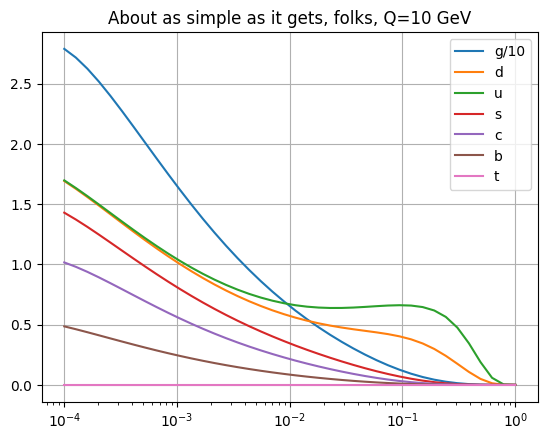

In [10]:
plt.plot(xvalues,input0[index(0)]/10,label='g/10')
plt.plot(xvalues,input0[index(1)],label='d')
plt.plot(xvalues,input0[index(2)],label='u')
plt.plot(xvalues,input0[index(3)],label='s')
plt.plot(xvalues,input0[index(4)],label='c')
plt.plot(xvalues,input0[index(5)],label='b')
plt.plot(xvalues,input0[index(6)],label='t')
plt.xscale("log")

plt.title('About as simple as it gets, folks, Q=10 GeV')
plt.grid(True)
plt.savefig("test.pdf")

plt.xscale("log")
plt.legend()
plt.show()


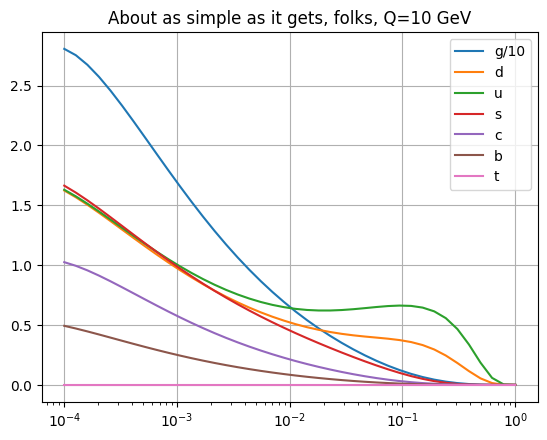

In [11]:
plt.plot(xvalues,input1[index(0)]/10,label='g/10')
plt.plot(xvalues,input1[index(1)],label='d')
plt.plot(xvalues,input1[index(2)],label='u')
plt.plot(xvalues,input1[index(3)],label='s')
plt.plot(xvalues,input1[index(4)],label='c')
plt.plot(xvalues,input1[index(5)],label='b')
plt.plot(xvalues,input1[index(6)],label='t')
plt.xscale("log")

plt.title('About as simple as it gets, folks, Q=10 GeV')
plt.grid(True)
plt.savefig("test.pdf")

plt.xscale("log")
plt.legend()
plt.show()


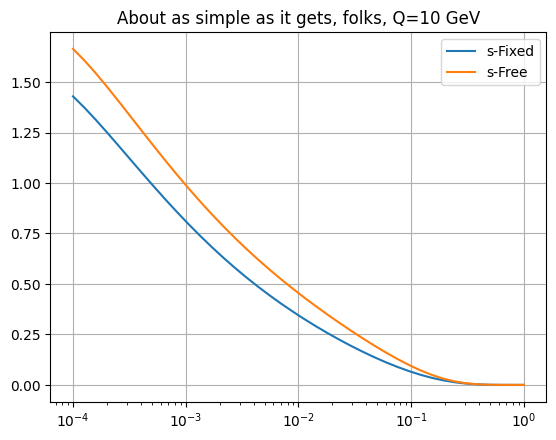

In [12]:
plt.plot(xvalues,input0[index(3)],label='s-Fixed')
plt.plot(xvalues,input1[index(3)],label='s-Free')
plt.xscale("log")

plt.title('About as simple as it gets, folks, Q=10 GeV')
plt.grid(True)
plt.savefig("test.pdf")

plt.xscale("log")
plt.legend()
plt.show()

## Let's Integrate

In [13]:
# Simpson's rule
# CAREFUL: WATCH THE ORDER:

In [14]:
from scipy import integrate
import numpy as np
x = np.arange(0, 10)
y = np.arange(0, 10)

In [15]:
integrate.simpson(y, x=x)

np.float64(40.5)

In [16]:
index(3)

9

In [17]:
# Integrate the s quark
print(integrate.simpson(input0[index(3)], x=xvalues),
      integrate.simpson(input1[index(3)], x=xvalues)
)

0.023582772959818272 0.03214465704752509


In [18]:
mom= np.zeros(13) # make an array w/ zeros
print(mom)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
flavor(0)

-6

In [20]:
mom0= np.zeros(13) # make an array w/ zeros
mom1= np.zeros(13) # make an array w/ zeros
#print(mom)

for i in range(13):
        # print(f"Outer loop: {i} ")
        mom0[i]=integrate.simpson(input0[i], x=xvalues)*100
        mom1[i]=integrate.simpson(input1[i], x=xvalues)*100
        print(f'{flavor(i):5.0f}', " = ",f'{mom0[i]:9.2f}', f'{mom1[i]:9.2f}')



   -6  =       0.00      0.00
   -5  =       0.48      0.48
   -4  =       1.28      1.28
   -3  =       2.37      3.22
   -2  =       3.63      3.49
   -1  =       3.31      2.48
    0  =      44.63     44.60
    1  =      13.04     12.73
    2  =      26.87     26.56
    3  =       2.36      3.21
    4  =       1.27      1.27
    5  =       0.48      0.48
    6  =       0.00      0.00


In [21]:
# Check that all the momentum probability fractions sum to one
print(sum(mom0),sum(mom1))

99.696469685498 99.78950494945929
